# **Final Project: Resolving Educational Institution Problems**

* Name: Dany Eka Saputra
* Email: [ekadany12@gmail.com](mailto:ekadany12@gmail.com)
* Dicoding ID: [danyeka_s](https://dicoding.com/users/danyeka_s)

# **1. Preparation**

## **1.1 Library Import**

Import all necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import joblib

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from google.colab import files

## **1.2 Data Loading**

Load the data from the [source](https://github.com/dicodingacademy/dicoding_dataset/tree/main/students_performance)

In [ ]:
# Dataset import from Dicoding GitHub Repository
dataset_url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'

# Read dataset
df = pd.read_csv(dataset_url, delimiter=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## **1.3 Data Preparation**

### 1.3.1 Dataset Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

The data contains information at the time of student enrollment, such as academic path, demographic information, and socio-economic factors, along with their academic performance at the conclusion of the first and second semesters.

* **Marital status** - The marital status of the student
* **Application mode** - The method of application used by the student
* **Application order** - The order in which the student applied (between 0 - first choice; and 9 last choice)
* **Course** - The course taken by the student
* **Daytime/evening attendance** - Whether the student attends classes during the day or in the evening
* **Previous qualification** - The qualification obtained by the student before enrolling in higher education
* **Previous qualification (grade)** - Grade of previous qualification (between 0 and 200)
* **Nacionality** - The nationality of the student
* **Mother's qualification** - The qualification of the student's mother
* **Father's qualification** - The qualification of the student's father
* **Mother's occupation** - The occupation of the student's mother
* **Father's occupation** - The occupation of the student's father
* **Admission grade** - Admission grade (between 0 and 200)
* **Displaced** - Whether the student is a displaced person (1-yes, 0-no)
* **Educational special needs** - Whether the student has any special educational needs (1-yes, 0-no)
* **Debtor** - Whether the student is a debtor (1-yes, 0-no)
* **Tuition fees up to date** - Whether the student's tuition fees are up to date (1-yes, 0-no)
* **Gender** - The gender of the student (1-male, 0-female)
* **Scholarship holder** - Whether the student is a scholarship holder (1-yes, 0-no)
* **Age at enrollment** - The age of the student at the time of enrollment
* **International** - Whether the student is an international student (1-yes, 0-no)
* **Curricular units 1st sem (credited)** - The number of curricular units credited by the student in the first semester
* **Curricular units 1st sem (enrolled)** - The number of curricular units enrolled by the student in the first semester
* **Curricular units 1st sem (evaluations)** - The number of curricular units evaluated by the student in the first semester
* **Curricular units 1st sem (approved)** - The number of curricular units approved by the student in the first semester

Check the unique value of each categorical data features

In [ ]:
for feature in df.select_dtypes(include='object'):
    print(feature)
    print(df[feature].unique(), '\n')

Status
['Dropout' 'Graduate' 'Enrolled'] 



Dataset descriptive statistics for numerical and categorical (object) data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Status,4424,3,Graduate,2209


### 1.3.2 Missing Value and Duplicate Data Handling

Check for missing value

In [ ]:
print(df.isnull().sum())

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Check for data duplicates

In [ ]:
df.duplicated().sum()

0

Since there are no missing values and duplicate data in the dataset, we can proceed to the next process

### 1.3.3 Unique Data

Check for unique data

In [ ]:
print(df.nunique())

Marital_status                                    6
Application_mode                                 18
Application_order                                 8
Course                                           17
Daytime_evening_attendance                        2
Previous_qualification                           17
Previous_qualification_grade                    101
Nacionality                                      21
Mothers_qualification                            29
Fathers_qualification                            34
Mothers_occupation                               32
Fathers_occupation                               46
Admission_grade                                 620
Displaced                                         2
Educational_special_needs                         2
Debtor                                            2
Tuition_fees_up_to_date                           2
Gender                                            2
Scholarship_holder                                2
Age_at_enrol

### 1.3.3 Label Decoding

Label Decoding for below features:

| Features | 0 | 1 | 2 | 3 | 4 | 5 | 6 |
|----------|---|---|---|---|---|---|---|
| **Marital_status** | - | Single | Married | Widower | Divorced | Facto Union | Legally Seperated |
| **Daytime_evening_attendance** | Evening | Daytime | - | - | - | - | - |
| **Displaced** | No | Yes | - | - | - | - | - |
| **Educational_special_needs** | No | Yes | - | - | - | - | - |
| **Debtor** | No | Yes | - | - | - | - | - |
| **Tuition_fees_up_to_date** | No | Yes | - | - | - | - | - |
| **Gender** | Female | Male | - | - | - | - | - |
| **Scholarship_holder** | No | Yes | - | - | - | - | - |
| **International** | No | Yes | - | - | - | - | - |

<br>

<details>
<summary><b>Application_mode</b></summary>
1 - 1st Phase - General Contingent<br>
2 - Ordinance No. 612/93<br>
5 - 1st Phase - Special Contingent (Azores Island)<br>
7 - Holders of Other Higher Courses<br>
10 - Ordinance No. 854-B/99<br>
15 - International Student (Bachelor)<br>
16 - 1st phase - Special Contingent (Madeira Island)<br>
17 - 2nd phase - General Contingent<br>
18 - 3rd phase - General Contingent<br>
26 - Ordinance No. 533-A/99, Item B2 (Different Plan)<br>
27 - Ordinance No. 533-A/99, Item B3 (Other Institution)<br>
39 - Over 23 Years Old<br>
42 - Transfer<br>
43 - Change of Course<br>
44 - Technological Specialization Diploma Holders<br>
51 - Change of Institution/Course<br>
53 - Short Cycle Diploma Holders<br>
57 - Change of Institution/Course (International)<br>
</details>

<br>

<details>
<summary><b>Course</b></summary>
33 - Biofuel Production Technologies<br>
171 - Animation and Multimedia Design<br>
8014 - Social Service (Evening Attendance)<br>
9003 - Agronomy<br>
9070 - Communication Design<br>
9085 - Veterinary Nursing<br>
9119 - Informatics Engineering<br>
9130 - Equinculture<br>
9147 - Management<br>
9238 - Social Service<br>
9254 - Tourism<br>
9500 - Nursing<br>
9556 - Oral Hygiene<br>
9670 - Advertising and Marketing Management<br>
9773 - Journalism and Communication<br>
9853 - Basic Education<br>
9991 - Management (Evening Attendance)<br>
</details>

<br>

<details>
<summary><b>Previous_qualification</b></summary>
1 - Secondary Education<br>
2 - Higher Education - Bachelor's Degree<br>
3 - Higher Education - Degree<br>
4 - Higher Education - Master's<br>
5 - Higher Education - Doctorate<br>
6 - Frequency of Higher Education<br>
9 - 12th Year of Schooling - Not Completed<br>
10 - 11th Year of Schooling - Not Completed<br>
12 - Other - 11th Year of Schooling<br>
14 - 10th Year of Schooling<br>
15 - 10th Year of Schooling - Not Completed<br>
19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.<br>
38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.<br>
39 - Technological Specialization Course<br>
40 - Higher Education - Degree (1st Cycle)<br>
42 - Professional Higher Technical Course<br>
43 - Higher Education - Master (2nd Cycle)<br>
</details>

<br>

<details>
<summary><b>Nacionality</b></summary>
1 - Portuguese<br>
2 - German<br>
6 - Spanish<br>
11 - Italian<br>
13 - Dutch<br>
14 - English<br>
17 - Lithuanian<br>
21 - Angolan<br>
22 - Cape Verdean<br>
24 - Guinean<br>
25 - Mozambican<br>
26 - Santomean<br>
32 - Turkish<br>
41 - Brazilian<br>
62 - Romanian<br>
100 - Moldova (Republic of)<br>
101 - Mexican<br>
103 - Ukrainian<br>
105 - Russian<br>
108 - Cuban<br>
109 - Colombian<br>
</details>

<br>

<details>
<summary><b>Mothers_qualification & Fathers_qualification</b></summary>
1 - Secondary Education - 12th Year of Schooling or Eq.<br>
2 - Higher Education - Bachelor's Degree<br>
3 - Higher Education - Degree<br>
4 - Higher Education - Master's<br>
5 - Higher Education - Doctorate<br>
6 - Frequency of Higher Education<br>
9 - 12th Year of Schooling - Not Completed<br>
10 - 11th Year of Schooling - Not Completed<br>
11 - 7th Year (Old)<br>
12 - Other - 11th Year of Schooling<br>
13 - 2nd Year Complementary High School Course<br>
14 - 10th Year of Schooling<br>
18 - General Commerce Course<br>
19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.<br>
20 - Complementary High School Course<br>
22 - Technical - Professional Course<br>
25 - Complementary High School Course - Not Concluded<br>
26 - 7th Year of Schooling<br>
27 - 2nd Cycle of the General High School Course<br>
29 - 9th Year of Schooling - Not Completed<br>
30 - 8th Year of Schooling<br>
31 - General Course of Administration and Commerce<br>
33 - Supplementary Accounting and Administration<br>
34 - Unknown<br>
35 - Can't Read or Write<br>
36 - Can Read Without Having a 4th Year of Schooling<br>
37 - Basic Education 1st Cycle (4th/5th Year) or Equiv.<br>
38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.<br>
39 - Technological Specialization Course<br>
40 - Higher Education - Degree (1st Cycle)<br>
41 - Specialized Higher Studies Course<br>
42 - Professional Higher Technical Course<br>
43 - Higher Education - Master (2nd Cycle)<br>
44 - Higher Education - Doctorate (3rd Cycle)<br>
</details>

<br>

<details>
<summary><b>Mothers_occupation & Fathers_occupation</b></summary>
0 - Student<br>
1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers<br>
2 - Specialists in Intellectual and Scientific Activities<br>
3 - Intermediate Level Technicians and Professions<br>
4 - Administrative Staff<br>
5 - Personal Services, Security and Safety Workers and Sellers<br>
6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry<br>
7 - Skilled Workers in Industry, Construction and Craftsmen<br>
8 - Installation and Machine Operators and Assembly Workers<br>
9 - Unskilled Workers<br>
10 - Armed Forces Professions<br>
90 - Other Situation<br>
99 - (Blank)<br>
101 - Armed Forces Officers<br>
102 - Armed Forces Sergeants<br>
103 - Other Armed Forces Personnel<br>
112 - Directors of Administrative and Commercial Services<br>
114 - Hotel, Catering, Trade and Other Services Directors<br>
121 - Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques<br>
122 - Health Professionals<br>
123 - Teachers<br>
124 - Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations<br>
125 - Specialists in Information and Communication Technologies (ICT)<br>
131 - Intermediate Level Science and Engineering Technicians and Professions<br>
132 - Technicians and Professionals, of Intermediate Level of Health<br>
134 - Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services<br>
135 - Information and Communication Technology Technicians<br>
141 - Office Workers, Secretaries in General and Data Processing Operators<br>
143 - Data, Accounting, Statistical, Financial Services and Registry-Related Operators<br>
144 - Other Administrative Support Staff<br>
151 - Personal Service Workers<br>
152 - Sellers<br>
153 - Personal Care Workers and the Like<br>
154 - Protection and Security Services Personnel<br>
161 - Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers<br>
163 - Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence<br>
171 - Skilled Construction Workers and the Like, Except Electricians<br>
172 - Skilled Workers in Metallurgy, Metalworking and Similar<br>
173 - Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like<br>
174 - Skilled Workers in Electricity and Electronics<br>
175 - Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts<br>
181 - Fixed Plant and Machine Operators<br>
182 - Assembly Workers<br>
183 - Vehicle Drivers and Mobile Equipment Operators<br>
191 - Cleaning Workers<br>
192 - Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry<br>
193 - Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport<br>
194 - Meal Preparation Assistants<br>
195 - Street Vendors (Except Food) and Street Service Providers<br>
</details>

In [ ]:
# @title Label Decoding Function
def label_decoding(df, feature):
    """
    Transform encoded feature in a DataFrame to their respective categorical labels

    Parameters
        df (pandas.DataFrame) : The DataFrame containing the feature to be transformed
        feature (str or list of str) : The name of the feature to be transformed

    Returns
        pandas.DataFrame : The DataFrame with the specified feature as categorical labels
    """

    category_mappings = {
        'Marital_status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
                           5: 'Facto Union', 6: 'Legally Seperated'},
        'Daytime_evening_attendance': {0: 'Evening', 1: 'Daytime'},
        'Gender': {0: 'Female', 1: 'Male'},
        'Application_mode' : {
            1: '1st Phase - General Contingent',
            2: 'Ordinance No. 612/93',
            5: '1st Phase - Special Contingent (Azores Island)',
            7: 'Holders of Other Higher Courses',
            10: 'Ordinance No. 854-B/99',
            15: 'International Student (Bachelor)',
            16: '1st Phase - Special Contingent (Madeira Island)',
            17: '2nd Phase - General Contingent',
            18: '3rd Phase - General Contingent',
            26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
            27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)',
            39: 'Over 23 Years Old',
            42: 'Transfer',
            43: 'Change of Course',
            44: 'Technological Specialization Diploma Holders',
            51: 'Change of Institution/Course',
            53: 'Short Cycle Diploma Holders',
            57: 'Change of Institution/Course (International)'
        },
        'Course': {
            33: 'Biofuel Production Technologies',
            171: 'Animation and Multimedia Design',
            8014: 'Social Service (Evening Attendance)',
            9003: 'Agronomy',
            9070: 'Communication Design',
            9085: 'Veterinary Nursing',
            9119: 'Informatics Engineering',
            9130: 'Equinculture',
            9147: 'Management',
            9238: 'Social Service',
            9254: 'Tourism',
            9500: 'Nursing',
            9556: 'Oral Hygiene',
            9670: 'Advertising and Marketing Management',
            9773: 'Journalism and Communication',
            9853: 'Basic Education',
            9991: 'Management (Evening Attendance)'
        },
        'Nacionality': {
            1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
            13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
            22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
            26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian',
            100: 'Moldova (Republic of)', 101: 'Mexican', 103: 'Ukrainian',
            105: 'Russian', 108: 'Cuban', 109: 'Colombian'
        },
        'Qualification': {
            1: 'Secondary Education - 12th Year of Schooling or Eq.',
            2: "Higher Education - Bachelor's Degree",
            3: 'Higher Education - Degree',
            4: "Higher Education - Master's",
            5: 'Higher Education - Doctorate',
            6: 'Frequency of Higher Education',
            9: '12th Year of Schooling - Not Completed',
            10: '11th Year of Schooling - Not Completed',
            11: '7th Year (Old)',
            12: 'Other - 11th Year of Schooling',
            13: '2nd Year Complementary High School Course',
            14: '10th Year of Schooling',
            15: '10th Year of Schooling - Not Completed',
            18: 'General Commerce Course',
            19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
            20: 'Complementary High School Course',
            22: 'Technical - Professional Course',
            25: 'Complementary High School Course - Not Concluded',
            26: '7th Year of Schooling',
            27: '2nd Cycle of the General High School Course',
            29: '9th Year of Schooling - Not Completed',
            30: '8th Year of Schooling',
            31: 'General Course of Administration and Commerce',
            33: 'Supplementary Accounting and Administration',
            34: 'Unknown',
            35: "Can't Read or Write",
            36: 'Can Read Without Having a 4th Year of Schooling',
            37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
            38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
            39: 'Technological Specialization Course',
            40: 'Higher Education - Degree (1st Cycle)',
            41: 'Specialized Higher Studies Course',
            42: 'Professional Higher Technical Course',
            43: 'Higher Education - Master (2nd Cycle)',
            44: 'Higher Education - Doctorate (3rd Cycle)'
        },
        'Occupation': {
            0: 'Student',
            1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
            2: 'Specialists in Intellectual and Scientific Activities',
            3: 'Intermediate Level Technicians and Professions',
            4: 'Administrative Staff',
            5: 'Personal Services, Security and Safety Workers and Sellers',
            6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
            7: 'Skilled Workers in Industry, Construction and Craftsmen',
            8: 'Installation and Machine Operators and Assembly Workers',
            9: 'Unskilled Workers',
            10: 'Armed Forces Professions',
            90: 'Other Situation',
            99: '(Blank)',
            101: 'Armed Forces Officers',
            102: 'Armed Forces Sergeants',
            103: 'Other Armed Forces Personnel',
            112: 'Directors of Administrative and Commercial Services',
            114: 'Hotel, Catering, Trade and Other Services Directors',
            121: 'Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques',
            122: 'Health Professionals',
            123: 'Teachers',
            124: 'Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations',
            125: 'Specialists in Information and Communication Technologies (ICT)',
            131: 'Intermediate Level Science and Engineering Technicians and Professions',
            132: 'Technicians and Professionals, of Intermediate Level of Health',
            134: 'Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services',
            135: 'Information and Communication Technology Technicians',
            141: 'Office Workers, Secretaries in General and Data Processing Operators',
            143: 'Data, Accounting, Statistical, Financial Services and Registry-Related Operators',
            144: 'Other Administrative Support Staff',
            151: 'Personal Service Workers',
            152: 'Sellers',
            153: 'Personal Care Workers and the Like',
            154: 'Protection and Security Services Personnel',
            161: 'Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers',
            163: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence',
            171: 'Skilled Construction Workers and the Like, Except Electricians',
            172: 'Skilled Workers in Metallurgy, Metalworking and Similar',
            173: 'Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like',
            174: 'Skilled Workers in Electricity and Electronics',
            175: 'Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts',
            181: 'Fixed Plant and Machine Operators',
            182: 'Assembly Workers',
            183: 'Vehicle Drivers and Mobile Equipment Operators',
            191: 'Cleaning Workers',
            192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry',
            193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport',
            194: 'Meal Preparation Assistants',
            195: 'Street Vendors (Except Food) and Street Service Providers'
        }
    }

    category_mappings['Previous_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_qualification'] = category_mappings['Qualification']
    category_mappings['Fathers_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_occupation'] = category_mappings['Occupation']
    category_mappings['Fathers_occupation'] = category_mappings['Occupation']

    binary_features = ['Displaced', 'Educational_special_needs', 'Debtor',
                       'Tuition_fees_up_to_date', 'Scholarship_holder',
                       'International']
    binary_mapping = {0: 'No', 1: 'Yes'}

    features = [feature] if isinstance(feature, str) else feature

    for f in features:
        if f in category_mappings:
            df[f] = df[f].map(category_mappings[f])
        elif f in binary_features:
            df[f] = df[f].map(binary_mapping)

    return df

In [ ]:
df_eda = df.copy()

df_eda = label_decoding(df_eda, ['Marital_status', 'Application_mode', 'Course',
                                 'Daytime_evening_attendance',
                                 'Previous_qualification', 'Nacionality',
                                 'Mothers_qualification', 'Fathers_qualification',
                                 'Mothers_occupation', 'Fathers_occupation',
                                 'Displaced', 'Educational_special_needs' ,
                                 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                                 'Scholarship_holder', 'International'])

df_eda

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st Phase - General Contingent,6,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,Single,1st Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,Single,1st Phase - General Contingent,1,Nursing,Daytime,Secondary Education - 12th Year of Schooling o...,154.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,Single,1st Phase - General Contingent,1,Management,Daytime,Secondary Education - 12th Year of Schooling o...,180.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
for feature in df_eda.select_dtypes(include='object'):
    print(feature)
    print(df_eda[feature].unique(), '\n')

Marital_status
['Single' 'Married' 'Divorced' 'Widower' 'Facto Union' 'Legally Seperated'] 

Application_mode
['2nd Phase - General Contingent' 'International Student (Bachelor)'
 '1st Phase - General Contingent' 'Over 23 Years Old'
 '3rd Phase - General Contingent' 'Short Cycle Diploma Holders'
 'Technological Specialization Diploma Holders'
 'Change of Institution/Course' 'Change of Course'
 'Holders of Other Higher Courses' 'Transfer'
 '1st Phase - Special Contingent (Madeira Island)'
 '1st Phase - Special Contingent (Azores Island)' 'Ordinance No. 612/93'
 'Ordinance No. 854-B/99' 'Change of Institution/Course (International)'
 'Ordinance No. 533-A/99, Item B2 (Different Plan)'
 'Ordinance No. 533-A/99, Item B3 (Other Institution)'] 

Course
['Animation and Multimedia Design' 'Tourism' 'Communication Design'
 'Journalism and Communication' 'Social Service (Evening Attendance)'
 'Management (Evening Attendance)' 'Nursing' 'Social Service'
 'Advertising and Marketing Management' 'Bas

### 1.3.4 Label Encoding

Label feature Encoding on the Status feature

In [ ]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

### 1.3.5 Cleaned Data Export

Export the cleaned dataset

In [ ]:
# Dataset for Business Dashboard
df_eda.to_csv('student_data_cleaned.csv', index=False)

# **2. Data Understanding**

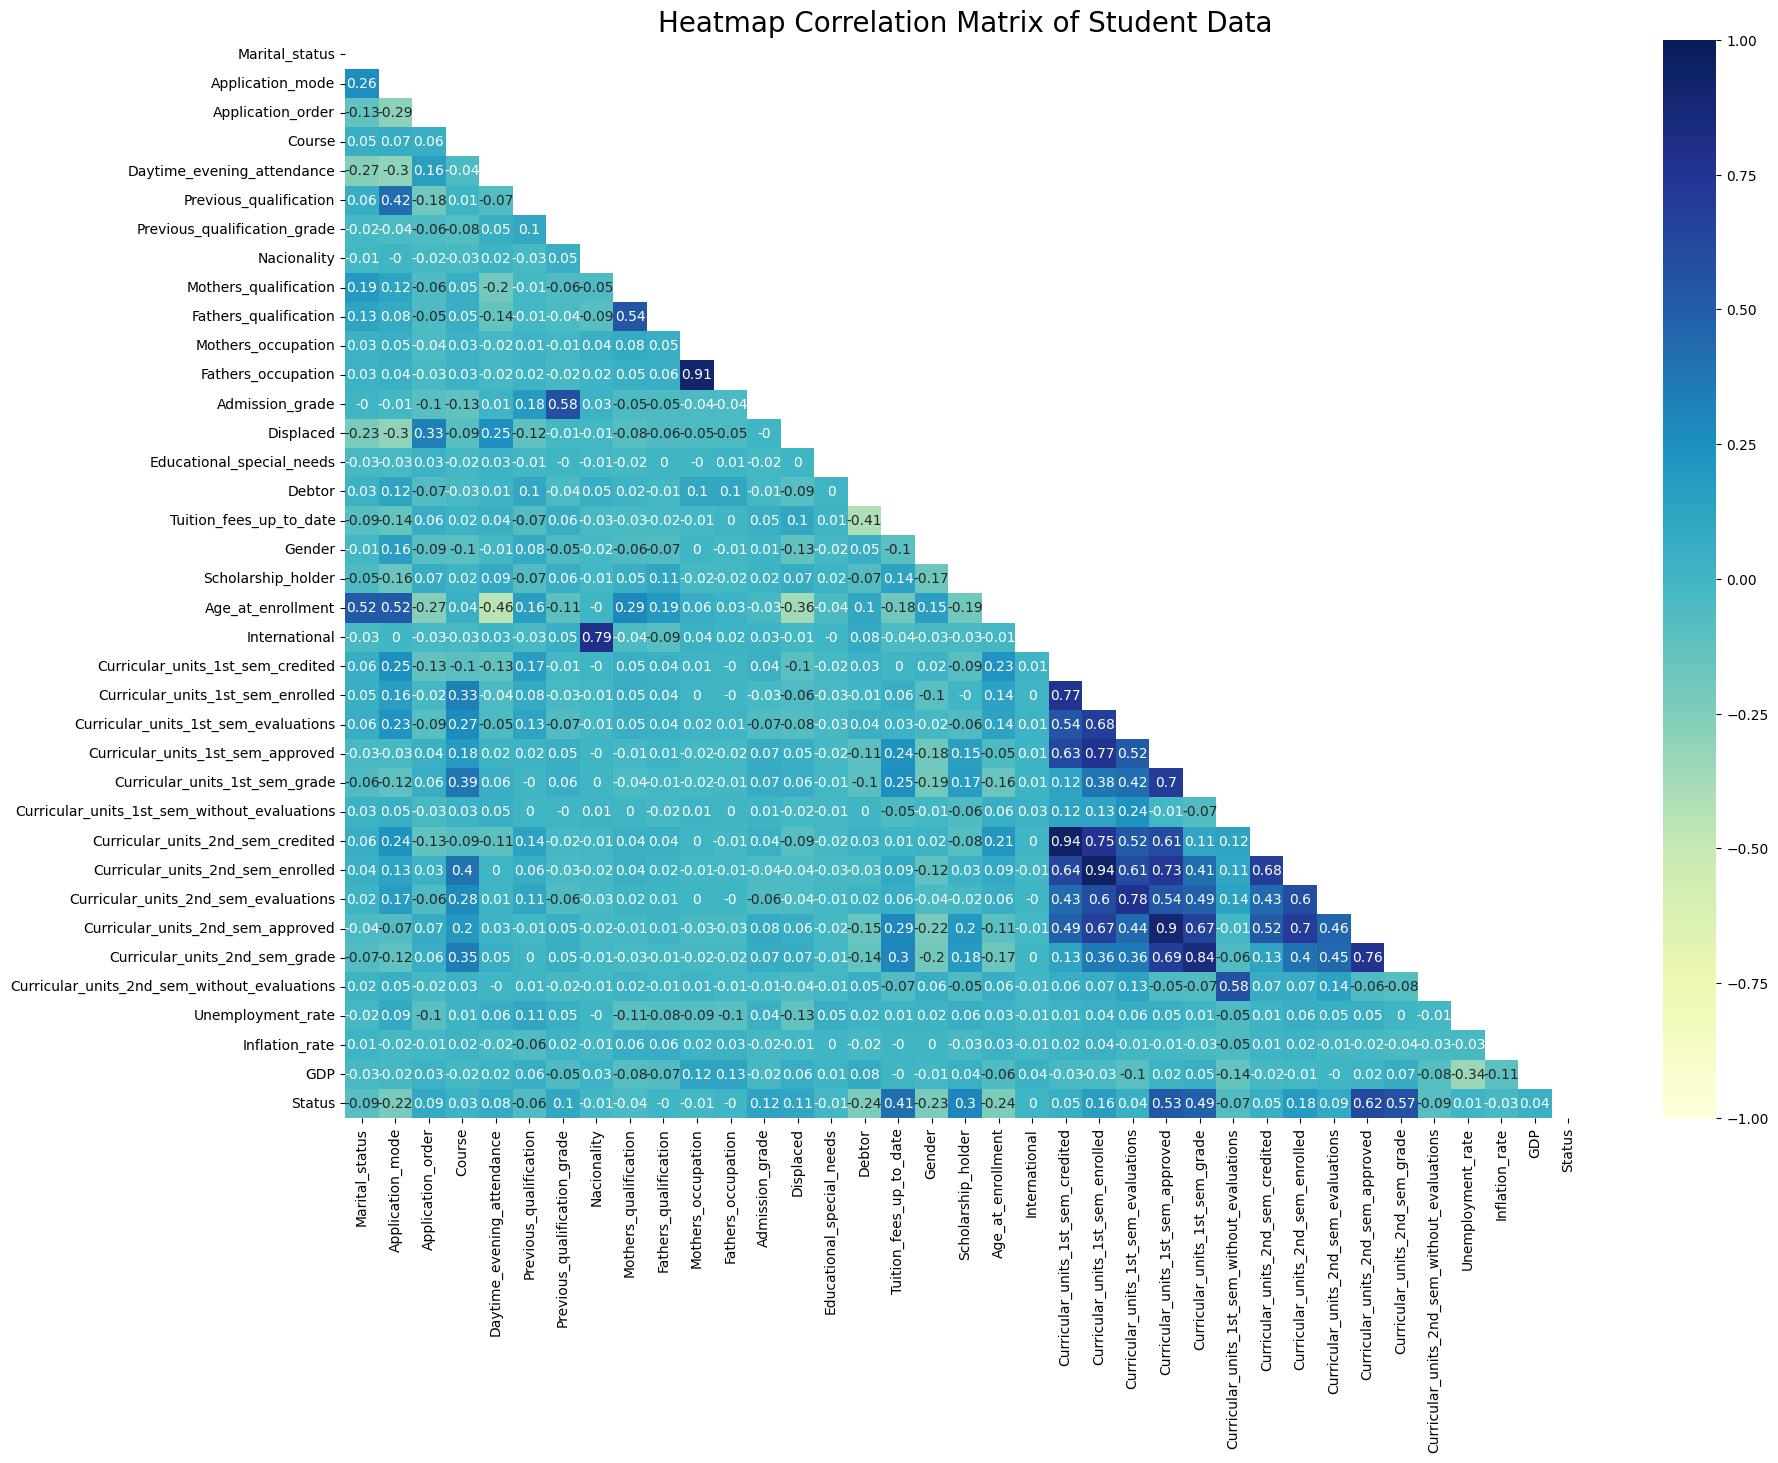

In [ ]:
plt.figure(figsize=(20, 14))
correlation_matrix = df.corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,annot=True, cmap='YlGnBu', mask=mask)
plt.title('Heatmap Correlation Matrix of Student Data', size=20)
plt.show()

Based on the correlation matrix plot above, some points related to `Status` are:
1. Features that have a **fairly strong** influence on `Status` are `Curricular_units_2nd_sem_approved` and `Curricular_units_2nd_sem_grade`.
2. Features that have a **moderate** influence on `Status` are `Curricular_units_1nd_sem_approved`, `Curricular_units_1nd_sem_grade`, `Tuition_fees_up_to_date`, and `Scholarship_holder`.
3. Features that have a **low** influence on `Status` are `Age_at_enrollment`, `Debtor`, `Gender`, and `Applicatoin_mode`.
4. And the rest are features that have a **very weak** influence on `Status`.

In [ ]:
# @title Define Pie Plot
def pie_plot(data, title):
    """
    Create a pie chart for the distribution of a categorical column.

    Parameters:
    - data: DataFrame, the dataset to plot.
    - title: str, the title of the plot.

    Returns:
    This function does not return any value but displays a pie chart.
    """
    data = data.value_counts()
    plt.pie(data, labels=data.index,
            autopct=lambda pct: f'{int(pct/100.*data.sum())} ({pct:.2f}%)')
    plt.title(f'Distribution of {title}')
    plt.show()

In [ ]:
# @title Define Count Plot
def count_plot(data, y, hue=None, title='Data', figsize=(8, 4)):
    """
    Create a countplot with annotations for a given dataset.

    Parameters:
    - data: DataFrame, the dataset to plot.
    - y: str, the column to plot on the y-axis.
    - hue: str, optional, the column for hue categorization.
    - title: str, the title of the plot.
    - figsize: tuple, the size of the figure.

    Returns:
    - This function does not return any value but displays a countplot.
    """
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=data, y=y, hue=hue,
                    order=data[y].value_counts().index)
    plt.title(f'Distribution of {title}')
    plt.grid()

    if hue:
        plt.legend(loc='lower right')

    # Add annotation label to each bar
    for bar in ax.patches:
        if bar.get_width() > 0 and bar.get_height() > 0:
            ax.annotate(
                f'{int(bar.get_width())}',
                (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                ha='left', va='center', textcoords='offset points', xytext=(5, 0))

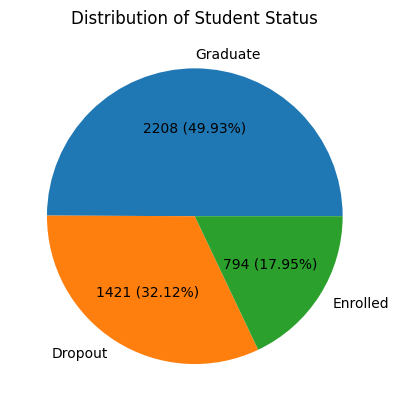

In [ ]:
pie_plot(df_eda['Status'], 'Student Status')

Students with Graduate status have the highest percentage, 49.93%, followed by students with Dropout, 32.12%, and Enrolled status who have the lowest percentage, only 17.95%.

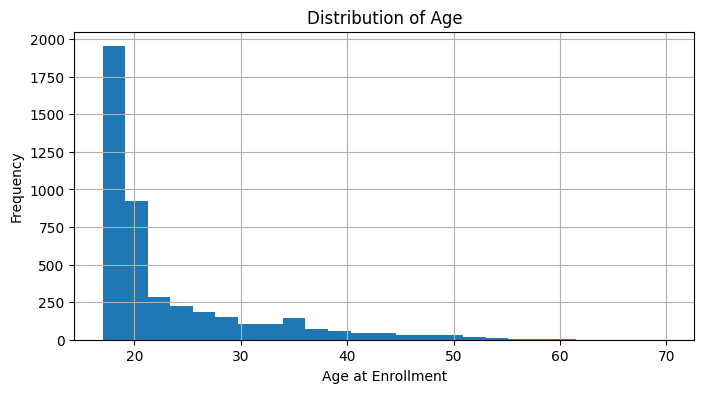

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(df_eda['Age_at_enrollment'], bins=25)
plt.title('Distribution of Age')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.grid()
plt.show()

The majority of students who register are aged 17 - 20 years.

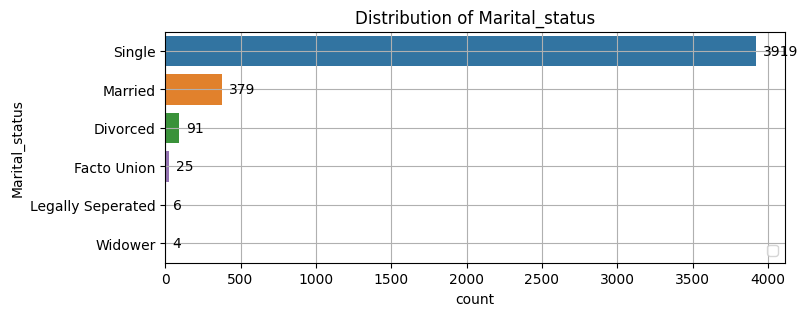

In [ ]:
count_plot(df_eda, 'Marital_status', 'Marital_status', 'Marital_status', (8, 3))

Most of the students have the Marital Status of Single.

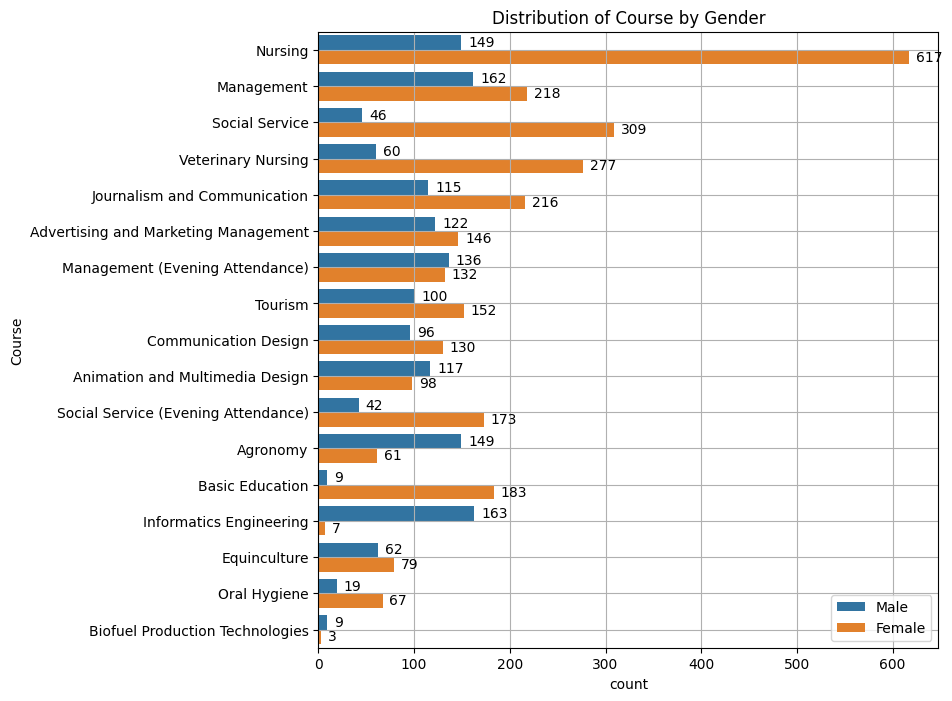

In [ ]:
count_plot(df_eda, 'Course', 'Gender', 'Course by Gender', (8, 8))

The Course with the most data is Nursing with the dominant gender being Female rather than Male. While the Course with the least data is Buofuel Productoin Technologies with a Male dominance. In addition, the most Male students are in the Informatics Engineering and Management Courses.

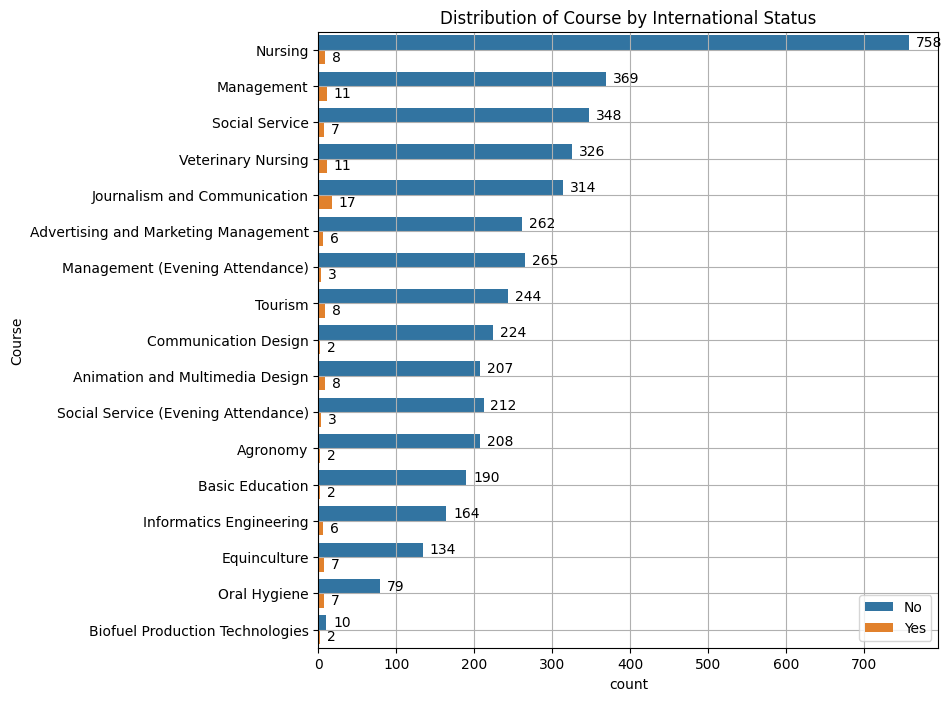

In [ ]:
count_plot(df_eda, 'Course', 'International', 'Course by International Status', (8, 8))

Overall, there are more local students than international students. International students are more likely to take Journalism and Communication courses.

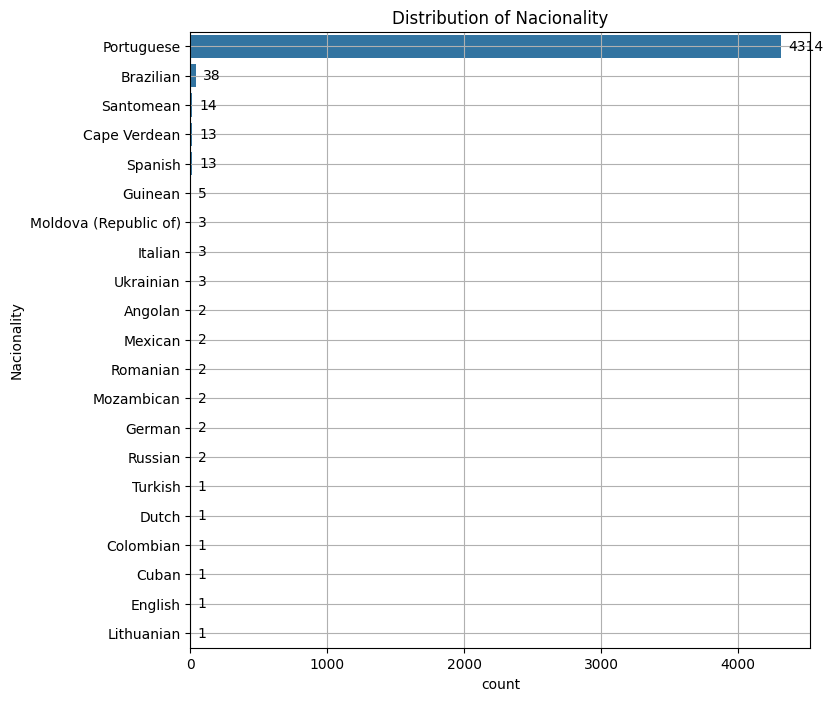

In [ ]:
count_plot(df_eda, 'Nacionality', title='Nacionality', figsize=(8, 8))

The most student nationality data comes from Portuguese, at 97.51% compared to others.

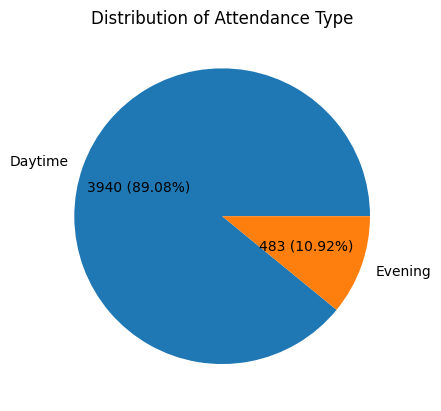

In [ ]:
pie_plot(df_eda['Daytime_evening_attendance'], 'Attendance Type')

Students with Daytime attendance have the highest percentage, 89.08%, while those who have Evening attendance were only 10.92%.

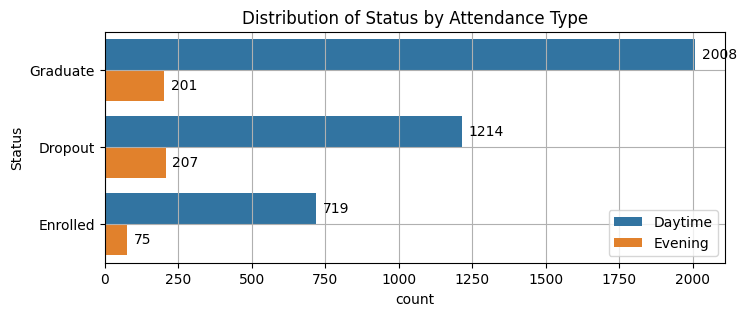

In [ ]:
count_plot(df_eda, 'Status', 'Daytime_evening_attendance', 'Status by Attendance Type', (8, 3))

Most students choose to study in daytime classes rather than on the evening classes for all three statuses, whether they are Graduates, Dropouts, or Enrolled.

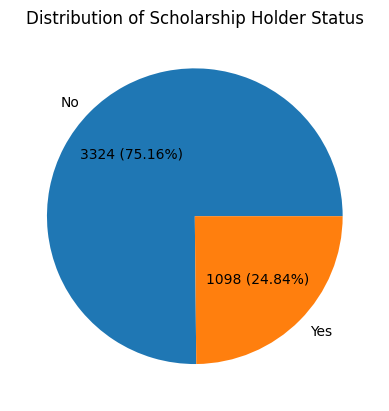

In [ ]:
pie_plot(df_eda['Scholarship_holder'], 'Scholarship Holder Status')

Students with Scholarships were only 24.84%, almost 1/4 of the total population. While those without scholarships were 75.16%.


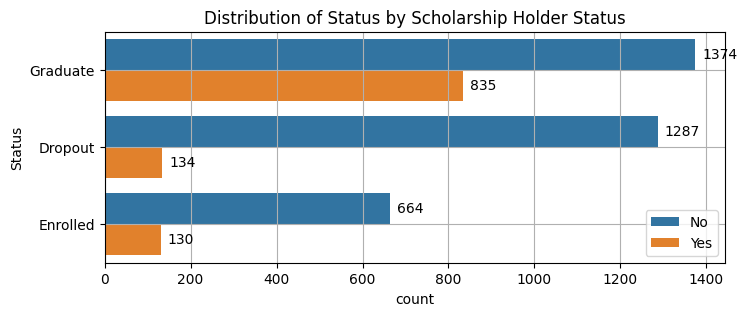

In [ ]:
count_plot(df_eda, 'Status', 'Scholarship_holder', 'Status by Scholarship Holder Status', (8, 3))

Students who receive scholarships and have graduate status are more than students who dropout. The number of students who receive scholarships with dropout status and who are currently enrolled is almost the same and not much different in number.

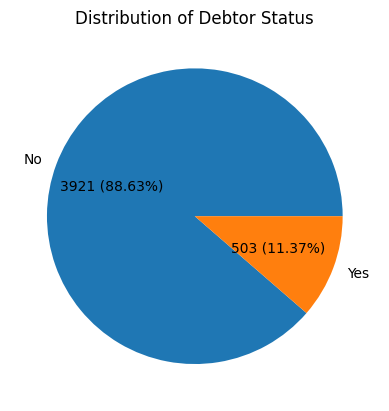

In [ ]:
pie_plot(df_eda['Debtor'], 'Debtor Status')

Only 11.37% of students have debt, while 88.63% do not.

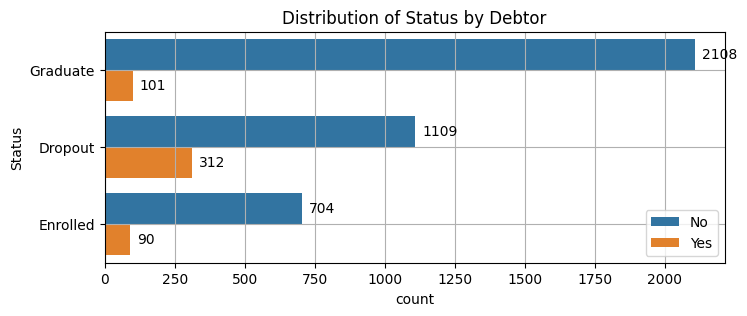

In [ ]:
count_plot(df_eda, 'Status', 'Debtor', 'Status by Debtor', (8, 3))

Students who are a debtor are clearly depicted as the most are those who have dropout status compared to those who have graduated or are currently enrolled. This illustrates the existence of a very strong financial factor on the graduation rate and student dropout.

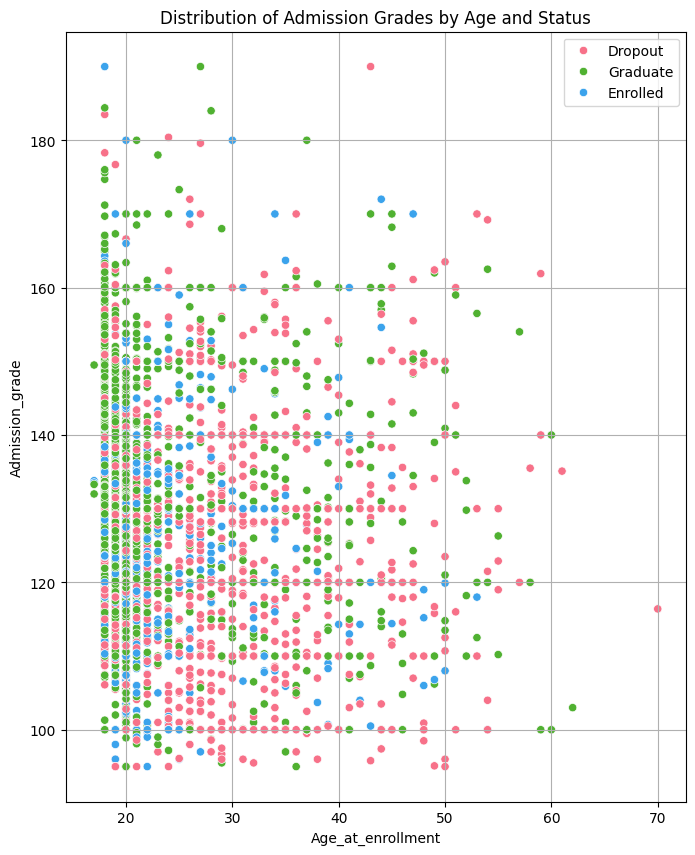

In [ ]:
plt.figure(figsize=(8, 10))
sns.scatterplot(data=df_eda, x='Age_at_enrollment', y='Admission_grade',
                hue='Status', palette='husl')
plt.title('Distribution of Admission Grades by Age and Status')
plt.legend(loc='upper right')
plt.grid()

Based on the scatterplot of the distribution of Admission Grades by Age and Status, it can be concluded that on average, most students who graduate are those aged under 20 to 25 with an average Admission Grade of around 120 to 160. Meanwhile, students aged 30 to 40 or even 50 have an average Admission Grade of 100 to 140 and Dropout status.

# **3. Data Preprocessing**

In [ ]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


Check the label values

In [ ]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

Exclude the row with Status value equals 1 (Enrolled) and change the Gradutae from 2 into 1

In [ ]:
df = df[df['Status'] != 1]
df = df.reset_index(drop=True)

df.loc[:, 'Status'] = df['Status'].replace({2: 1})
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
3626,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
3627,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
3628,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [ ]:
df['Status'].value_counts()

,count
Status,
1,2209
0,1421


In this dataset, the label feature used is Status, whether the student is a Graduate or Dropout.

## **3.1 Feature Selection**

Filter all data features that have an absolute correlation value of less than 0.1

In [ ]:
df_filtered = df.loc[:, df.corr()['Status'].abs().ge(0.1)]
df_filtered

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,122.0,127.3,1,0,1,1,0,20,0,0,0.000000,0,0,0,0.000000,0,0
1,1,15,160.0,142.5,1,0,0,1,0,19,6,6,14.000000,6,6,6,13.666667,0,1
2,1,1,122.0,124.8,1,0,0,1,0,19,6,0,0.000000,6,0,0,0.000000,0,0
3,1,17,122.0,119.6,1,0,1,0,0,20,6,6,13.428571,6,10,5,12.400000,0,1
4,2,39,100.0,141.5,0,0,1,0,0,45,6,5,12.333333,6,6,6,13.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,125.0,122.2,0,0,1,1,0,19,6,5,13.600000,6,8,5,12.666667,0,1
3626,1,1,120.0,119.0,1,1,0,0,0,18,6,6,12.000000,6,6,2,11.000000,0,0
3627,1,1,154.0,149.5,1,0,1,0,1,30,7,7,14.912500,8,9,1,13.500000,0,0
3628,1,1,180.0,153.8,1,0,1,0,1,20,5,5,13.800000,5,6,5,12.000000,0,1


In [ ]:
df_filtered.describe()

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,132.920606,127.293939,0.549036,0.113774,0.866116,0.344077,0.266942,23.461157,6.337466,4.791460,10.534860,6.296419,7.763085,4.518457,10.036155,0.142149,0.608540
std,0.613009,17.358595,13.238373,14.611295,0.497658,0.317580,0.340575,0.475132,0.442423,7.827994,2.570773,3.237845,5.057694,2.263020,3.964163,3.162376,5.481742,0.747670,0.488144
min,1.000000,1.000000,95.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,125.000000,118.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,5.000000,3.000000,11.000000,5.000000,6.000000,2.000000,10.517857,0.000000,0.000000
50%,1.000000,17.000000,133.100000,126.500000,1.000000,0.000000,1.000000,0.000000,0.000000,20.000000,6.000000,5.000000,12.341429,6.000000,8.000000,5.000000,12.333333,0.000000,1.000000
75%,1.000000,39.000000,140.000000,135.100000,1.000000,0.000000,1.000000,1.000000,1.000000,25.000000,7.000000,6.000000,13.500000,7.000000,10.000000,6.000000,13.500000,0.000000,1.000000
max,6.000000,57.000000,190.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,26.000000,26.000000,18.875000,23.000000,33.000000,20.000000,18.571429,12.000000,1.000000


In [ ]:
df_filtered.to_csv('student_data_filtered.csv', index=False)

## **3.2 Data Splitting**

Split the data into independent variable (X) and dependent variable (y) as a label

In [ ]:
X = df_filtered.drop(['Status'], axis=1)
y = df_filtered['Status']

## **3.3 Data Resampling**

In [ ]:
smote = SMOTE(random_state=20241124)
X_smote, y_smote = smote.fit_resample(X, y)

y_counter = collections.Counter(y)
y_smote_counter = collections.Counter(y_smote)

df_comparison = pd.DataFrame({
    'None': y_counter,
    'SMOTE': y_smote_counter
})

df_comparison.loc['Total'] = [sum(y_counter.values()), sum(y_smote_counter.values())]
df_comparison

,None,SMOTE
0,1421,2209
1,2209,2209
Total,3630,4418


## **3.4 Train-Test Split**

Split the resampled data into train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=20241116, stratify=y_smote)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (3534, 18)
y_train : (3534,)
X_test  : (884, 18)
y_test  : (884,)


## **3.5 Data Standardization**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train:\n{X_train}\n')
print(f'X_test:\n{X_test}')

X_train:
[[-0.29437224  1.43984557  0.56572219 ... -0.00432693  0.60159057
  -0.18461772]
 [-0.29437224 -1.03991657  0.41333811 ...  0.61980994  0.65521521
  -0.18461772]
 [-0.29437224  1.15150114  1.3276426  ...  0.30774151  0.77970097
  -0.18461772]
 ...
 [-0.29437224 -0.69390325  0.56572219 ...  0.61980994  0.90897465
  -0.18461772]
 [-0.29437224 -1.03991657 -1.72003903 ...  0.61980994  0.43497116
  -0.18461772]
 [-0.29437224 -1.03991657  0.26095403 ...  0.61980994  0.61451794
  -0.18461772]]

X_test:
[[-0.29437224 -1.03991657 -2.4057674  ...  0.61980994  0.63606355
  -0.18461772]
 [-0.29437224  1.3245078  -0.65335046 ...  1.2439468   0.61645704
  -0.18461772]
 [-0.29437224  1.43984557  0.56572219 ... -1.25260065 -1.6046802
  -0.18461772]
 ...
 [ 1.45699391 -0.69390325 -0.95811862 ... -0.62846379  0.46369865
  -0.18461772]
 [-0.29437224 -1.03991657 -0.31926549 ... -1.25260065 -1.6046802
  -0.18461772]
 [-0.29437224 -0.52089659  0.56572219 ...  0.93187837  0.34796793
  -0.18461772]]


# **4. Modelling**

In [ ]:
# Define the models
models = {
    'LR': LogisticRegression(class_weight='balanced', max_iter=10000),
    'SVM': SVC(class_weight='balanced', max_iter=10000),
    'DT': DecisionTreeClassifier(class_weight='balanced'),
    'GB': GradientBoostingClassifier(),
    'RF': RandomForestClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB()
}

# Define the metrics
metrics = {metric: [] for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']}

# Fit models and calculate metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    metrics['Accuracy'].append(accuracy_score(y_test, pred))
    metrics['Precision'].append(precision_score(y_test, pred))
    metrics['Recall'].append(recall_score(y_test, pred))
    metrics['F1-Score'].append(f1_score(y_test, pred))

In [ ]:
# Create a DataFrame from the collected metrics
model_metrics = pd.DataFrame(metrics, index=models.keys())
model_metrics

,Accuracy,Precision,Recall,F1-Score
LR,0.910633,0.900662,0.923077,0.911732
SVM,0.912896,0.887473,0.945701,0.915663
DT,0.859729,0.875000,0.839367,0.856813
GB,0.911765,0.893939,0.934389,0.913717
RF,0.923077,0.903017,0.947964,0.924945
KNN,0.889140,0.859833,0.929864,0.893478
NB,0.846154,0.808468,0.907240,0.855011


The Random Forest Classifier outperforms the other models in terms of evaluation metrics, making it the chosen model for use.

In [ ]:
model_rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
model_rf

RandomForestClassifier(class_weight='balanced')

In [ ]:
y_train_rf = model_rf.predict(X_train)
y_test_rf = model_rf.predict(X_test)

# **5. Evaluation**

In [ ]:
# @title ## **5.1 Evaluation Report Model**
def evaluation_report(y_train, y_predicted, title='Data'):
    print('Classification Report on ' + title)
    print(classification_report(y_train, y_predicted))

    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_train, y_predicted), annot=True, fmt='d')
    plt.title('Confusion Matrix on ' + title)
    plt.ylabel('True Label Status', fontsize=10)
    plt.xlabel('Predicted Label Status', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.show()

Classification Report on Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1767
           1       1.00      1.00      1.00      1767

    accuracy                           1.00      3534
   macro avg       1.00      1.00      1.00      3534
weighted avg       1.00      1.00      1.00      3534



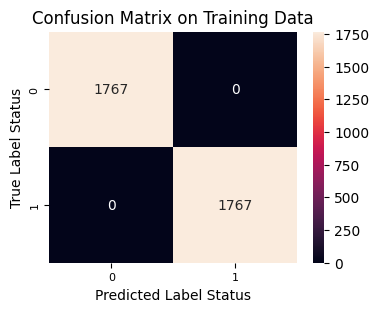

In [ ]:
evaluation_report(y_train, y_train_rf, title='Training Data')

Classification Report on Testing Data
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       442
           1       0.90      0.94      0.92       442

    accuracy                           0.92       884
   macro avg       0.92      0.92      0.92       884
weighted avg       0.92      0.92      0.92       884



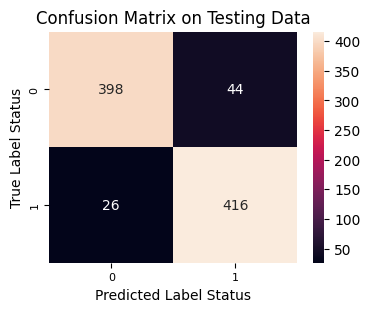

In [ ]:
evaluation_report(y_test, y_test_rf, title='Testing Data')

## **5.2 Hyperparameter Tuning**

In [ ]:
# Hyperparameter tuning on base model using Grid Search Cross Validation
param_grid = {
    'n_estimators': [100, 250, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 10, 20],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'oob_score': [False],
    'class_weight': ['balanced']
}

clf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
clf

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 250, 500],
                         'oob_score': [False]},
             verbose=3)

In [ ]:
# Fit for the best model params estimators
best_model = clf.fit(X_train, y_train)
best_model.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features='log2', min_samples_leaf=2)

In [ ]:
y_train_best = best_model.predict(X_train)
y_test_best = best_model.predict(X_test)

Classification Report on Training Data Best Model
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1767
           1       0.96      0.99      0.98      1767

    accuracy                           0.98      3534
   macro avg       0.98      0.98      0.98      3534
weighted avg       0.98      0.98      0.98      3534



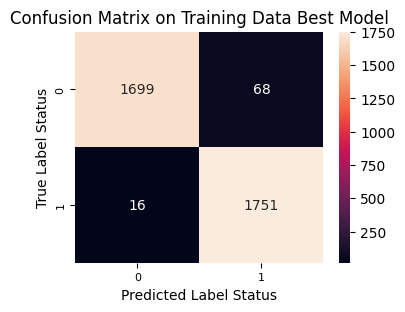

In [ ]:
evaluation_report(y_train, y_train_best, title='Training Data Best Model')

Classification Report on Testing Data Best Model
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       442
           1       0.90      0.95      0.92       442

    accuracy                           0.92       884
   macro avg       0.92      0.92      0.92       884
weighted avg       0.92      0.92      0.92       884



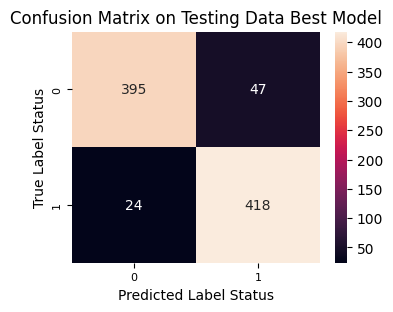

In [ ]:
evaluation_report(y_test, y_test_best, title='Testing Data Best Model')

# **6 Model Export and Project Requirements**

In [ ]:
joblib.dump(best_model, 'model_rf.joblib')

['model_rf.joblib']

In [ ]:
!pip freeze > requirements.txt

In [ ]:
# files.download('model_rf.joblib')
# files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>